# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Курс Питон/Lesson 14/netflix_users_data.csv')

In [ ]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования строки в camel case
def to_camel_case(s):
    # Разбиваем строку на слова по '_'
    words = s.split('_')
    # Превращаем первое слово в нижний регистр, остальные - в верхний регистр
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию ко всем столбцам DataFrame
df.columns = [to_camel_case(col) for col in df.columns]

# Выводим обновленный DataFrame для проверки
df.head()

,user id,subscription type,monthly revenue,join date,last payment date,country,age,gender,device,plan duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.columns

Index(['user id', 'subscription type', 'monthly revenue', 'join date',
       'last payment date', 'country', 'age', 'gender', 'device',
       'plan duration'],
      dtype='object')

# Приведение типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user id            2500 non-null   int64 
 1   subscription type  2500 non-null   object
 2   monthly revenue    2500 non-null   int64 
 3   join date          2500 non-null   object
 4   last payment date  2500 non-null   object
 5   country            2500 non-null   object
 6   age                2500 non-null   int64 
 7   gender             2500 non-null   object
 8   device             2500 non-null   object
 9   plan duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Приводим столбцы 'join date' и 'last payment date' к типу datetime
df['join date'] = pd.to_datetime(df['join date'], errors='coerce')
df['last payment date'] = pd.to_datetime(df['last payment date'], errors='coerce')
# Параметр errors='coerce' позволит преобразовать некорректные даты в NaT (Not a Time)
# Это полезно для обработки возможных ошибок в данных

# Выводим информацию о DataFrame, чтобы убедиться, что типы данных изменились
df.dtypes  # Проверяем типы данных в DataFrame

<ipython-input-8-77eee641ecd6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['join date'] = pd.to_datetime(df['join date'], errors='coerce')
<ipython-input-8-77eee641ecd6>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last payment date'] = pd.to_datetime(df['last payment date'], errors='coerce')


,0
user id,int64
subscription type,object
monthly revenue,int64
join date,datetime64[ns]
last payment date,datetime64[ns]
country,object
age,int64
gender,object
device,object
plan duration,object


# Поиск дублей и пропусков в данных

In [ ]:
df.isna().sum() # поиск пропусков

,0
user id,0
subscription type,0
monthly revenue,0
join date,0
last payment date,0
country,0
age,0
gender,0
device,0
plan duration,0


Пропусков в данных нет.

In [ ]:
# Поиск дублей.
df.duplicated().sum()

0

Дублирующихся записей нет.

# Исследовательский анализ данных

In [ ]:
df

,user id,subscription type,monthly revenue,join date,last payment date,country,age,gender,device,plan duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


## Количество уникальных пользователей

In [ ]:
# Получаем количество уникальных пользователей
unique_users = df['user id'].nunique()  # Подсчитываем уникальные значения в колонке 'user id'

# Находим дату, с которой появились пользователи
min_join_date = df['join date'].min()  # Находим минимальную дату в колонке 'join date'

# Выводим результаты
print(f'Количество уникальных пользователей: {unique_users}')  # Выводим количество уникальных пользователей
print(f'Период, с которого появились пользователи: {min_join_date}')  # Выводим дату появления первых пользователей

Количество уникальных пользователей: 2500
Период, с которого появились пользователи: 2021-05-09 00:00:00


In [ ]:
min_join_date = df['join date'].max()
min_join_date

Timestamp('2023-12-01 00:00:00')

У нас данные за период с 09.05.2021 по 01.12.2023.

## Возраст пользователей

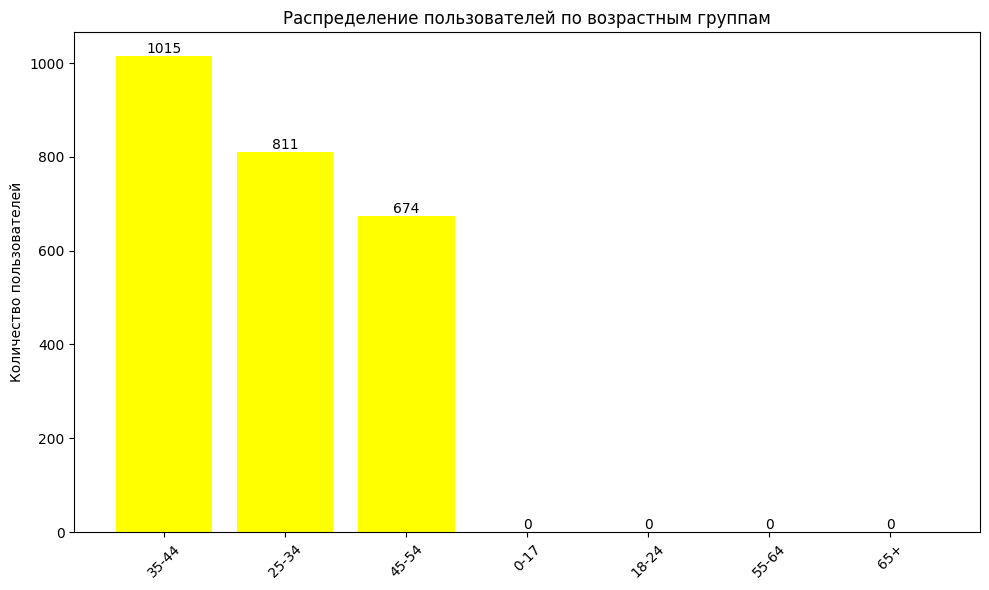

In [ ]:
import matplotlib.pyplot as plt

# Разобьем пользователей на возрастные группы
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Определяем возрастные группы
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Метки для групп

# Создаем новую колонку с возрастными группами
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Считаем количество пользователей в каждой возрастной группе
age_group_counts = df['age_group'].value_counts().sort_values(ascending=False)

# Создаем график
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='yellow')

# Подписываем количество пользователей над каждым столбиком
for bar in bars:
    yval = bar.get_height()  # Получаем высоту столбика
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Настройка графика
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрастным группам')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(False)  # Убираем сетку

# Показываем график
plt.tight_layout()
plt.show()

Больше всего пользователей в возрасте от 35 до 44 лет (1015 человек).
Аналитика на выборке из 2500 пользователей.

## Пол пользователей

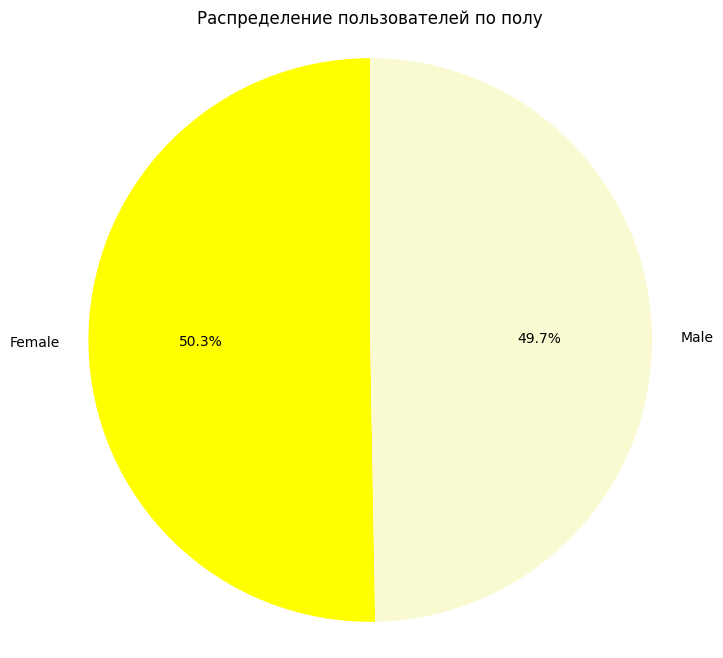

In [ ]:
# Подсчитаем количество пользователей по полу
gender_counts = df['gender'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))  # Устанавливаем размер графика
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgoldenrodyellow'])
plt.title('Распределение пользователей по полу')  # Заголовок графика
plt.axis('equal')  # Сохраняем соотношение осей
plt.grid(False)  # Убираем сетку

# Показываем график
plt.show()

In [ ]:
gender_counts.reset_index()

,gender,count
0,Female,1257
1,Male,1243


Пользователей мужского и женского пола практически поравну. Перевес женщин в 0,3% (14 человек) не существенен.

## Устройства (device) пользователей

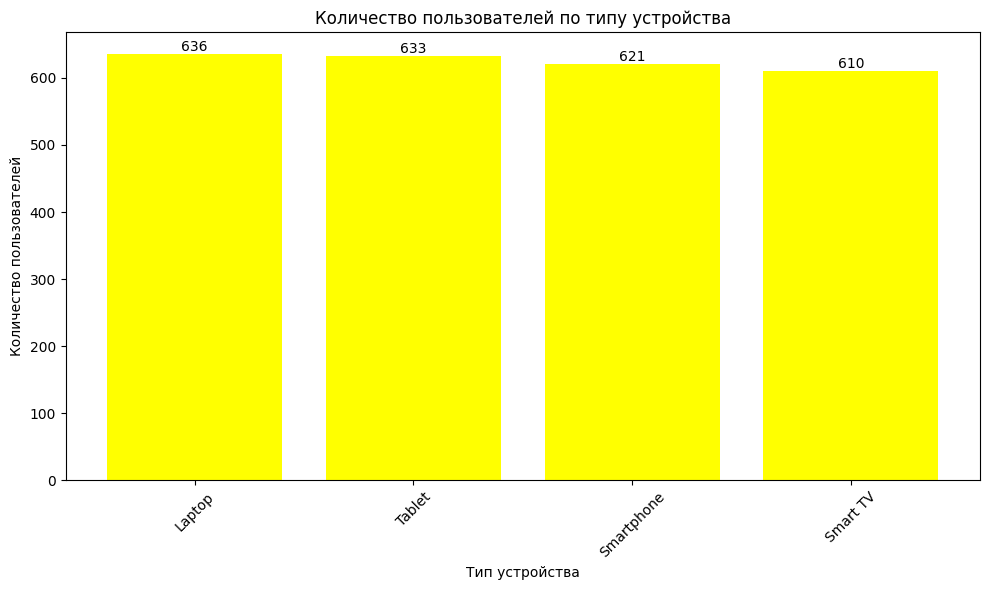

In [ ]:
# Группируем данные по 'device' и считаем количество пользователей для каждого устройства
device_counts = df['device'].value_counts()

# Сортируем данные по убыванию
sorted_device_counts = device_counts.sort_values(ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
bars = plt.bar(sorted_device_counts.index, sorted_device_counts.values, color='yellow')  # Столбцы желтого цвета

# Добавляем заголовок и метки осей
plt.title('Количество пользователей по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')

# Убираем сетку
plt.grid(False)

# Подписываем количество пользователей над каждым столбиком
for bar in bars:
    yval = bar.get_height()  # Получаем высоту столбика
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Подписываем значение

# Поворачиваем метки на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()  # Упаковываем элементы графика
plt.show()

Данные распределены равномерно между четырьмя группами.

## Тип подписки пользователей

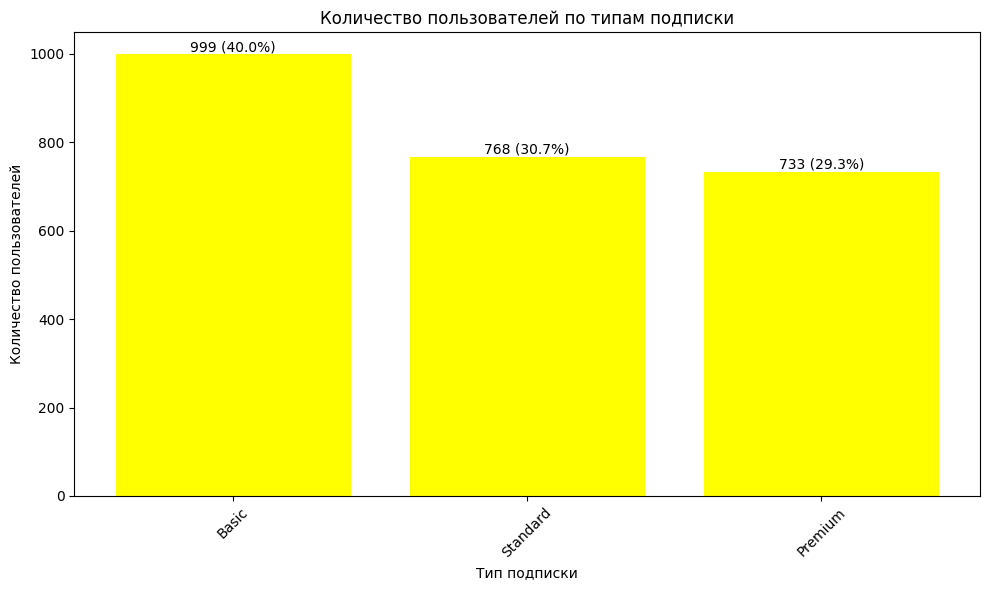

In [ ]:
# Шаг 1: Подсчет количества пользователей по типам подписки
subscription_counts = df['subscription type'].value_counts()

# Шаг 2: Определение общего числа пользователей
total_users = subscription_counts.sum()

# Шаг 3: Создание графика
plt.figure(figsize=(10, 6))  # Установка размера графика
bars = plt.bar(subscription_counts.index, subscription_counts.values, color='yellow')  # Создание столбчатой диаграммы

# Шаг 4: Подпись количества пользователей над каждым столбиком
for bar in bars:
    yval = bar.get_height()  # Высота столбика
    percent = (yval / total_users) * 100  # Процент от общего числа пользователей
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval} ({percent:.1f}%)',
             ha='center', va='bottom')  # Добавление текста

# Шаг 5: Добавление заголовка и меток осей
plt.title('Количество пользователей по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

# Шаг 6: Удаление сетки
plt.grid(False)

# Шаг 7: Отображение графика
plt.xticks(rotation=45)  # Поворот меток на оси x для лучшей читаемости
plt.tight_layout()  # Подгонка графика для предотвращения наложения
plt.show()

40% пользователей используют подписку Basic. Подписки Standard и Premium на вторм месте: Standard 30.7% пользователей, Premium 29.3%.

## Локация пользователей

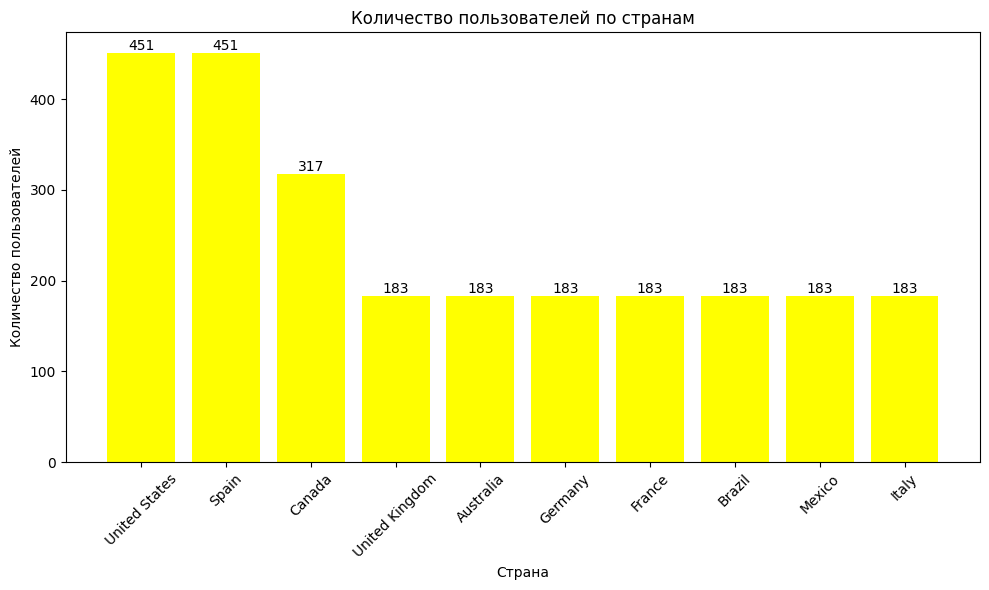

In [ ]:
# Шаг 1: Подсчет количества пользователей по странам
country_counts = df['country'].value_counts()

# Шаг 2: Создание графика
plt.figure(figsize=(10, 6))  # Установка размера графика
bars = plt.bar(country_counts.index, country_counts.values, color='yellow')  # Создание столбчатой диаграммы

# Шаг 3: Подпись количества пользователей над каждым столбиком
for bar in bars:
    yval = bar.get_height()  # Высота столбика
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval),  # Добавление текста
             ha='center', va='bottom')  # Центрирование текста

# Шаг 4: Добавление заголовка и меток осей
plt.title('Количество пользователей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')

# Шаг 5: Удаление сетки
plt.grid(False)

# Шаг 6: Отображение графика
plt.xticks(rotation=45)  # Поворот меток на оси x для лучшей читаемости
plt.tight_layout()  # Подгонка графика для предотвращения наложения
plt.show()  # Вывод графика на экран

Больше всего пользователей из Соединенных Штатаов и Испании (по 451 чел.), на втором месте Канада (317 чел).
Аналитика на выборке из 2500 пользователей.

##  Динамика привлечения пользователей

<ipython-input-20-59b1b1276aed>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='join date').size()


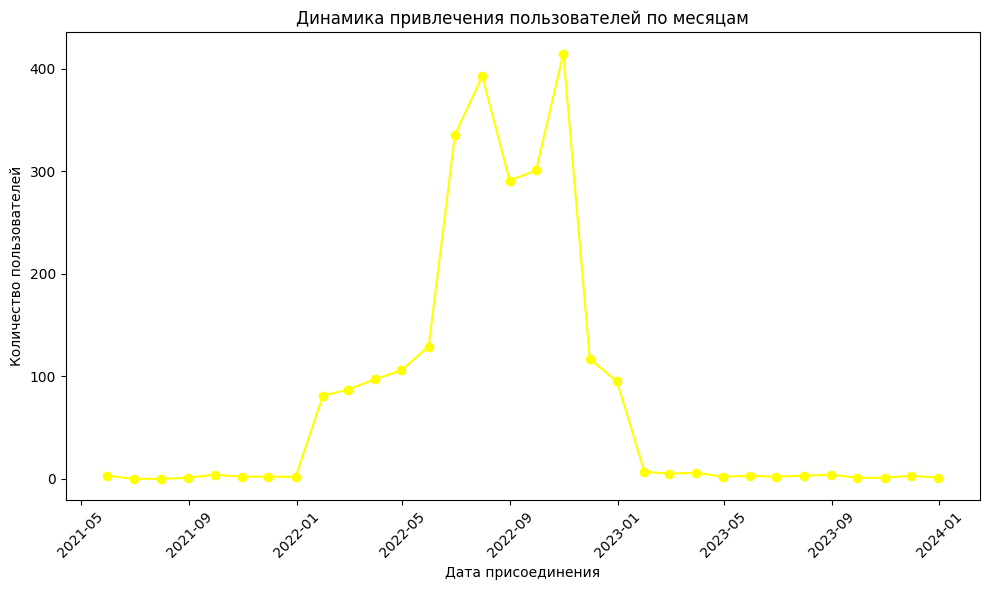

In [ ]:
# Шаг 2: Подсчет количества пользователей по месяцам
# Группируем по месяцам и считаем количество пользователей
monthly_counts = df.resample('M', on='join date').size()

# Шаг 3: Создание графика
plt.figure(figsize=(10, 6))  # Установка размера графика
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='yellow')  # Линейный график с желтым цветом и маркерами

# Шаг 4: Добавление заголовка и меток осей
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Дата присоединения')
plt.ylabel('Количество пользователей')

# Шаг 5: Удаление сетки
plt.grid(False)

# Шаг 6: Отображение графика
plt.xticks(rotation=45)  # Поворот меток на оси x для лучшей читаемости
plt.tight_layout()  # Подгонка графика для предотвращения наложения
plt.show()  # Вывод графика на экран

В январе 2022г. начинается прирост пользователей, с июня по август значительный рост: от 130 до 400 человек. В сентябре-октябре небольшой спад, а в ноябре 2022г максимальный пик. Далее начинается значительный спад, который с февраля 2023г почти равен нулю.
Т.о. максимальное количество клиентов было привлечено в августе и ноябре 2022г.

## Динамика выручки сервиса

<ipython-input-21-bf705769ea4f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_range = pd.date_range(start=row['join date'], end=row['last payment date'], freq='M')
<ipython-input-21-bf705769ea4f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_range = pd.date_range(start=row['join date'], end=row['last payment date'], freq='M')
<ipython-input-21-bf705769ea4f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_range = pd.date_range(start=row['join date'], end=row['last payment date'], freq='M')
<ipython-input-21-bf705769ea4f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_range = pd.date_range(start=row['join date'], end=row['last payment date'], freq='M')
<ipython-input-21-bf705769ea4f>:7: FutureWarning: 'M' is deprecated and will be removed 

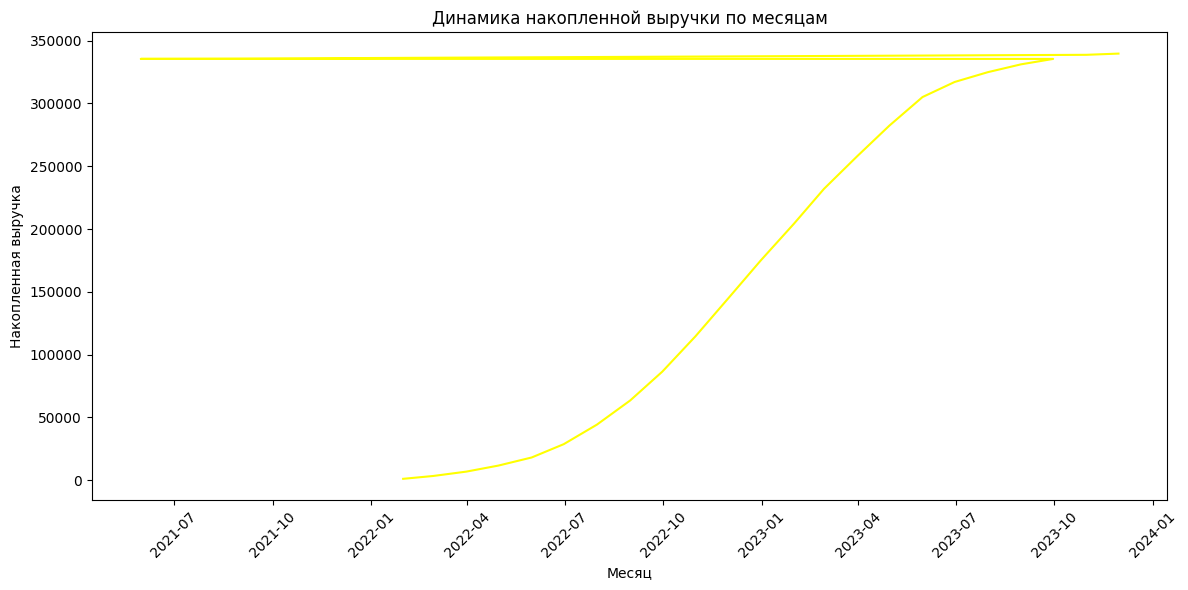

In [ ]:
# Создаем новый датафрейм для накопленной выручки
cumulative_revenue = pd.DataFrame()

# Рассчитываем накопленную выручку для каждого пользователя
for index, row in df.iterrows():
    # Определяем диапазон месяцев от join date до last payment date
    month_range = pd.date_range(start=row['join date'], end=row['last payment date'], freq='M')

    # Для каждого месяца в диапазоне, добавляем выручку
    for month in month_range:
        # Если месяц уже есть в cumulative_revenue, добавляем выручку
        if month in cumulative_revenue.index:
            cumulative_revenue.loc[month, 'revenue'] += row['monthly revenue']
        else:
            cumulative_revenue.loc[month, 'revenue'] = row['monthly revenue']

# Заполняем пропуски нулями (если дохода не было)
cumulative_revenue.fillna(0, inplace=True)

# Накопленная выручка
cumulative_revenue['cumulative_revenue'] = cumulative_revenue['revenue'].cumsum()

# Построим линейный график накопленной выручки
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue.index, cumulative_revenue['cumulative_revenue'], color='yellow')

# Настройка графика
plt.title('Динамика накопленной выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Накопленная выручка')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid(False)  # Убираем сетку

# Показать график
plt.tight_layout()
plt.show()

С февраля по ноябрь 2022г наблюдается стабильный рост накопленной выручки, что соответствует периоду активного привлечения пользователей.

## Платежеспособность

<ipython-input-22-f227aa21ad38>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('age group')['monthly revenue'].sum().sort_values(ascending=False)


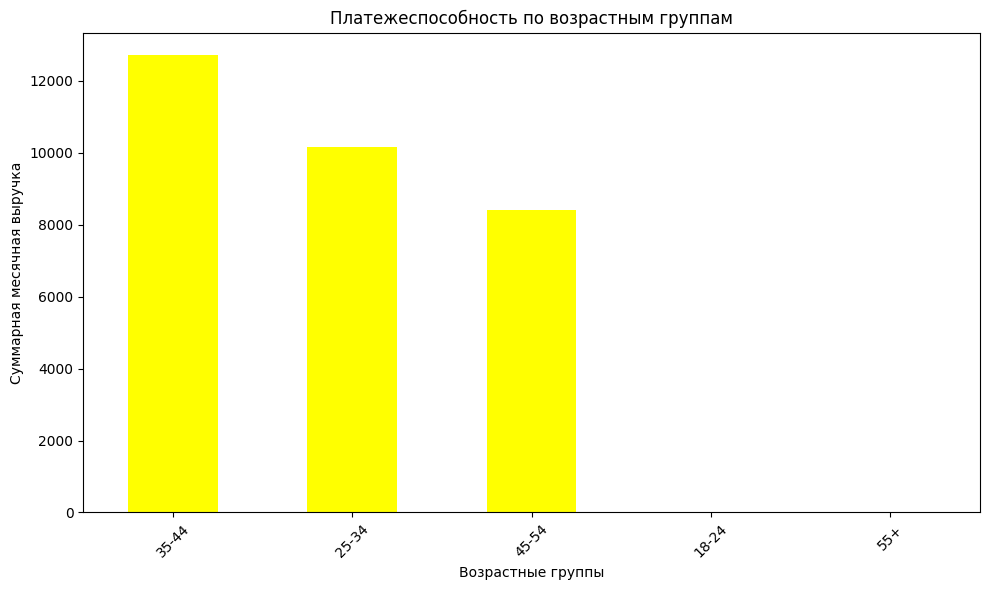

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

# Разделим клиентов на корзины по возрасту
# Определим границы корзин (например, 18-24, 25-34, 35-44, 45-54, 55+)
bins = [17, 24, 34, 44, 54, 100]  # Устанавливаем границы для корзин
labels = ['18-24', '25-34', '35-44', '45-54', '55+']  # Названия корзин
df['age group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Группируем данные по возрастным группам и суммируем месячную выручку
revenue_by_age_group = df.groupby('age group')['monthly revenue'].sum().sort_values(ascending=False)

# Построим график
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
revenue_by_age_group.plot(kind='bar', color='yellow')  # Построение графика с желтым цветом

# Настройка графика
plt.title('Платежеспособность по возрастным группам')  # Заголовок графика
plt.xlabel('Возрастные группы')  # Подпись оси X
plt.ylabel('Суммарная месячная выручка')  # Подпись оси Y
plt.xticks(rotation=45)  # Поворот меток по оси X для удобства чтения
plt.grid(False)  # Убираем сетку

# Показываем график
plt.tight_layout()  # Подгоняем элементы графика
plt.show()

Больше всего выручки сервис получает с пользователей в возрасте от 35 до 44 лет.
Эта же возраствная группа самая многочисленная.

## Зависимость типа тарифа от группы возраста пользователя

<ipython-input-23-f63d19c8940b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_by_age_group = df.groupby(['age group', 'subscription type']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

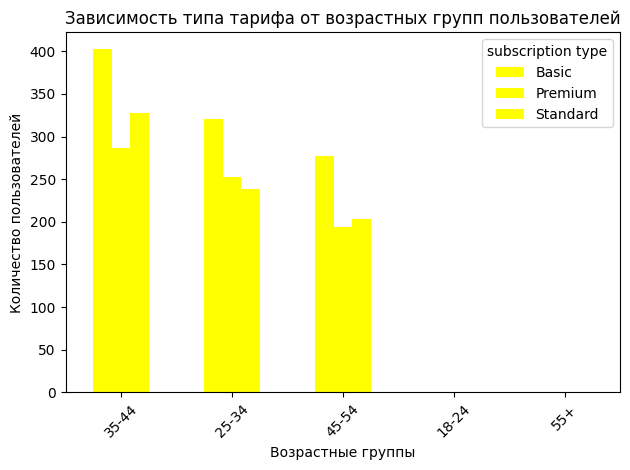

In [ ]:
# посмотреть зависимость типа тарифа от группы возраста пользователя

# Разделим пользователей на возрастные группы
# Определим границы корзин (например, 18-24, 25-34, 35-44, 45-54, 55+)
bins = [17, 24, 34, 44, 54, 100]  # Устанавливаем границы для корзин
labels = ['18-24', '25-34', '35-44', '45-54', '55+']  # Названия корзин
df['age group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Группируем данные по типу подписки и возрастным группам и считаем количество пользователей
subscription_by_age_group = df.groupby(['age group', 'subscription type']).size().unstack(fill_value=0)

# Сортируем по убыванию для каждой группы возраста
subscription_by_age_group = subscription_by_age_group.sort_values(by=subscription_by_age_group.columns.tolist(), ascending=False)

# Построим график
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
subscription_by_age_group.plot(kind='bar', color='yellow')  # Построение графика с желтым цветом

# Настройка графика
plt.title('Зависимость типа тарифа от возрастных групп пользователей')  # Заголовок графика
plt.xlabel('Возрастные группы')  # Подпись оси X
plt.ylabel('Количество пользователей')  # Подпись оси Y
plt.xticks(rotation=45)  # Поворот меток по оси X для удобства чтения
plt.grid(False)  # Убираем сетку

# Показываем график
plt.tight_layout()  # Подгоняем элементы графика
plt.show()

In [ ]:
subscription_by_age_group.reset_index()

subscription type,age group,Basic,Premium,Standard
0,35-44,402,286,327
1,25-34,320,253,238
2,45-54,277,194,203
3,18-24,0,0,0
4,55+,0,0,0


Во всех возрастных группах лидирует тариф Basic.
В группе 35-44 на втором месте тариф Standard, на третьем тариф Premium.
В группе 25-34 на втором месте тариф Premium, на третьем тариф Standard, но разрыв в пользователях между тарифами очень маленький.
В группе 45-54 с большим отрывом лидирует тариф Basic, разница между Premium и Standard маленькая, но Standard на втором месте по числу пользователей.

## Зависимость типа тарифа от страны пользователя


<Figure size 1200x600 with 0 Axes>

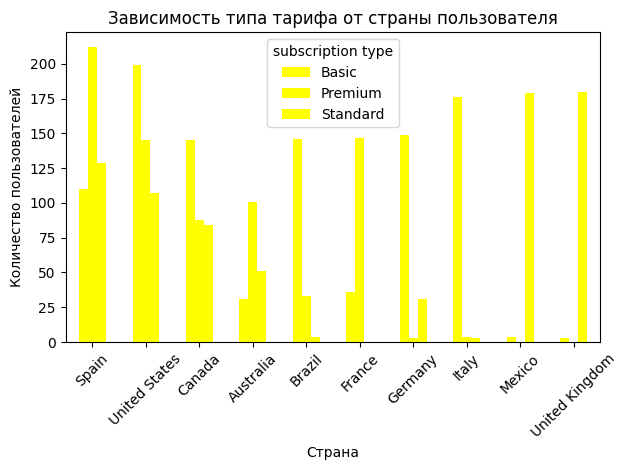

In [ ]:
# Группируем данные по стране и типу подписки, подсчитываем количество пользователей в каждой группе
subscription_by_country = df.groupby(['country', 'subscription type']).size().unstack(fill_value=0)

# Сортируем значения по убыванию для каждой страны
# Для этого мы рассчитываем общее количество пользователей по каждой стране
subscription_by_country['total'] = subscription_by_country.sum(axis=1)
subscription_by_country = subscription_by_country.sort_values(by='total', ascending=False)

# Удаляем временный столбец 'total', поскольку он нам больше не нужен
subscription_by_country = subscription_by_country.drop(columns='total')

# Построим график
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
subscription_by_country.plot(kind='bar', color='yellow')  # Построение графика с желтым цветом

# Настройка графика
plt.title('Зависимость типа тарифа от страны пользователя')  # Заголовок графика
plt.xlabel('Страна')  # Подпись оси X
plt.ylabel('Количество пользователей')  # Подпись оси Y
plt.xticks(rotation=45)  # Поворот меток по оси X для удобства чтения
plt.grid(False)  # Убираем сетку

# Показываем график
plt.tight_layout()  # Подгоняем элементы графика
plt.show()


In [ ]:
subscription_by_country

subscription type,Basic,Premium,Standard
country,,,
Spain,110,212,129
United States,199,145,107
Canada,145,88,84
Australia,31,101,51
Brazil,146,33,4
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179


В каждой стране один тариф сильно преобладает над другими.
В Испании лидирует Premium, в Соединенных Штатах и Канаде - Basic.
Premium лидирует только в трех странах из выборки: Испании, Австралии и Франции.
Basic лидирует в Соединенных Штатах, Канаде, Бразилии, Германии и Италии.
Standard на первом месте в Мексике и Великобритании.


# Выводы

##1 Аналитика на выборке из 2500 пользователей. Данные за период с 09.05.2021 по 01.12.2023.

##2 Большая часть пользователей в возрасте от 35 до 44 лет.

##3 Пользователей мужского и женского пола практически поравну

##4 Больше всего выручки сервис получает с пользователей в возрасте от 35 до 44 лет. Эта же возраствная группа самая многочисленная.

##5 Данные распределены равномерно между четырьмя группами используемых устройств.

##6 40% пользователей используют подписку Basic. Подписки Standard и Premium на вторм месте: Standard 30.7% пользователей, Premium 29.3%.

##7 Во всех возрастных группах лидирует тариф Basic. В группе 35-44 на втором месте тариф Standard, на третьем тариф Premium. В группе 25-34 на втором месте тариф Premium, на третьем тариф Standard, но разрыв между тарифами очень маленький. В группе 45-54 с большим отрывом лидирует тариф Basic, разница между Premium и Standard маленькая, но Standard на втором месте по числу пользователей.

##8 В каждой стране один тариф сильно преобладает над другими. В Испании лидирует Premium, в Соединенных Штатах и Канаде - Basic. Premium лидирует только в трех странах из выборки: Испании, Австралии и Франции. Basic лидирует в Соединенных Штатах, Канаде, Бразилии, Германии и Италии. Standard на первом месте в Мексике и Великобритании.

##9 Больше всего пользователей из Соединенных Штатаов и Испании (по 451 чел.), на втором месте Канада (317 чел). В остальных странах пользователей одинаковое количество

##10 В январе 2022г. начинается прирост пользователей, с июня по август значительный рост: от 130 до 400 человек. В сентябре-октябре небольшой спад, а в ноябре 2022г максимальный пик. Далее начинается значительный спад, который с февраля 2023г почти равен нулю. Т.о. максимальное количество клиентов было привлечено в августе и ноябре 2022г.

##11 С февраля по ноябрь 2022г наблюдается стабильный рост накопленной выручки, что соответствует периоду активного привлечения пользователей.